<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [13]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-03 10:58:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  61.0MB/s    in 2.5s    

2025-07-03 10:58:46 (61.0 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [14]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
!pip install numpy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [15]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [17]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [18]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [19]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [20]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [21]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [22]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


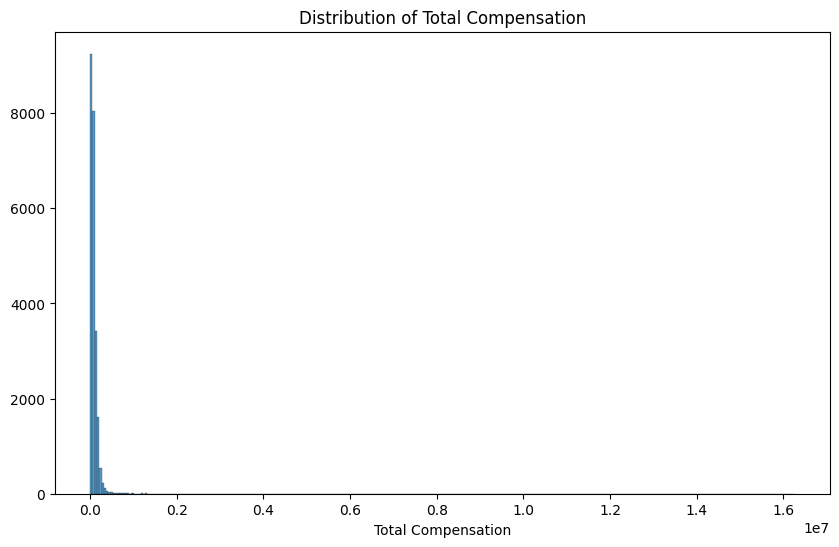

In [23]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT * FROM main WHERE ConvertedCompYearly IS NOT NULL"
df_filtered = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the box plot
plt.figure(figsize=(10, 6))
sns.histplot(x=df_filtered['ConvertedCompYearly'])

# Set labels and title
plt.xlabel('Total Compensation')
plt.ylabel('') 
plt.title('Distribution of Total Compensation')

# Show the plot
plt.show()

**Box Plots**

Plot a box plot of Age.


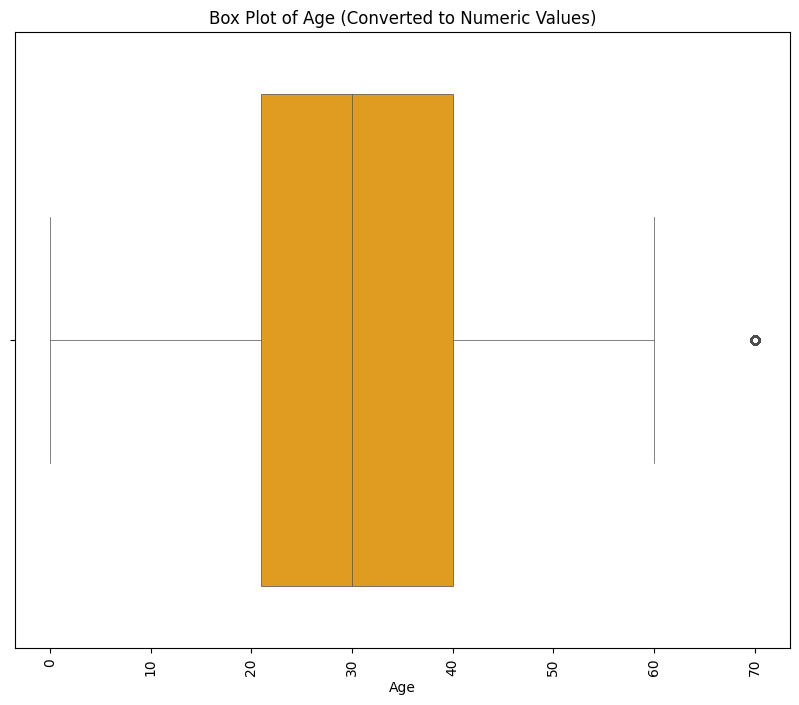

In [24]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Convert the 'Age' column to numeric values
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 30, '35-44 years old': 40,
    '45-54 years old': 50, '55-64 years old': 60, '65 years or older': 70, 'Prefer not to say': 0
}
df['AgeNum'] = df['Age'].map(age_mapping)

plt.figure(figsize=(10,8))

sns.boxplot(data=df,x='AgeNum',color='orange',linewidth=0.5)
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.ylabel('')
plt.title('Box Plot of Age (Converted to Numeric Values)')

# Show the plot
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


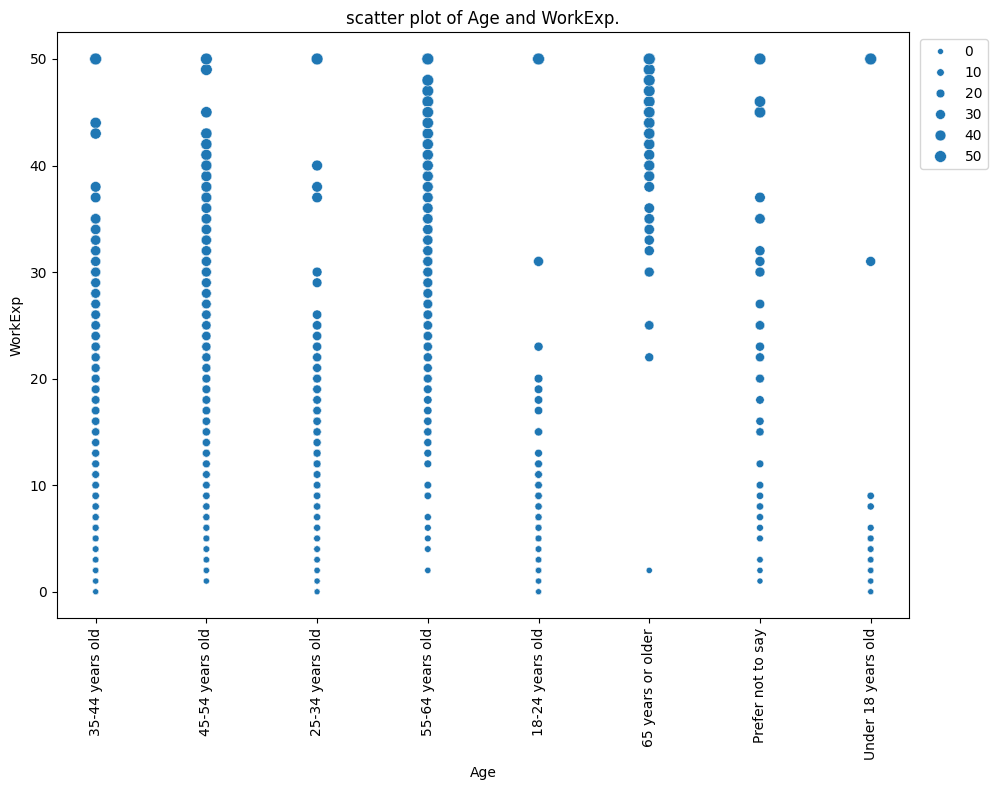

In [25]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query= "SELECT Age, WorkExp FROM main WHERE Age IS NOT NULL AND WorkExp IS NOT NULL"
df= pd.read_sql_query(query, conn)

# Close the connection
conn.close()

plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Age', y='WorkExp',size='WorkExp')
plt.title('scatter plot of Age and WorkExp.')
plt.xlabel('Age')
plt.ylabel('WorkExp')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper right')
plt.tight_layout()
plt.show()


Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [26]:
#connect to database
conn= sqlite3.connect("survey-data.sqlite")

#load the data from datset
query="Select * From main Where Age is NOT NULL"
df=pd.read_sql_query(query, conn)

#close connection
conn.close()

df[['TimeSearching','Frustration']].isnull().any(axis=1).sum()
df = df.dropna(subset=['TimeSearching', 'Frustration'])


In [27]:
import pandas as pd

weights = {
    "Amount of technical debt": 3,
    "Complexity of tech stack for build": 2,
    "Complexity of tech stack for deployment": 2,
    "Maintaining security of code being produced": 2,
    "Maintaining security of systems/platforms used in work": 2,
    "Patching/updating core components": 2,
    "Number of software tools in use": 1,
    "Tracking my work": 1,
    "Showing my contributions": 1,
    "Reliability of tools/systems used in work": 2,
    "None of these": 0
}

def calculate_frustration(row):
    issues = [i.strip() for i in row.split(';')]
    return sum(weights.get(issue, 0) for issue in issues)

df["frustration_score"] = df["Frustration"].apply(calculate_frustration)


def classify(score):
    if score <= 5:
        return "Low"
    elif score <= 10:
        return "Medium"
    else:
        return "High"

df["frustration_level"] = df["frustration_score"].apply(classify)

df['TimeSearching'].size

28085

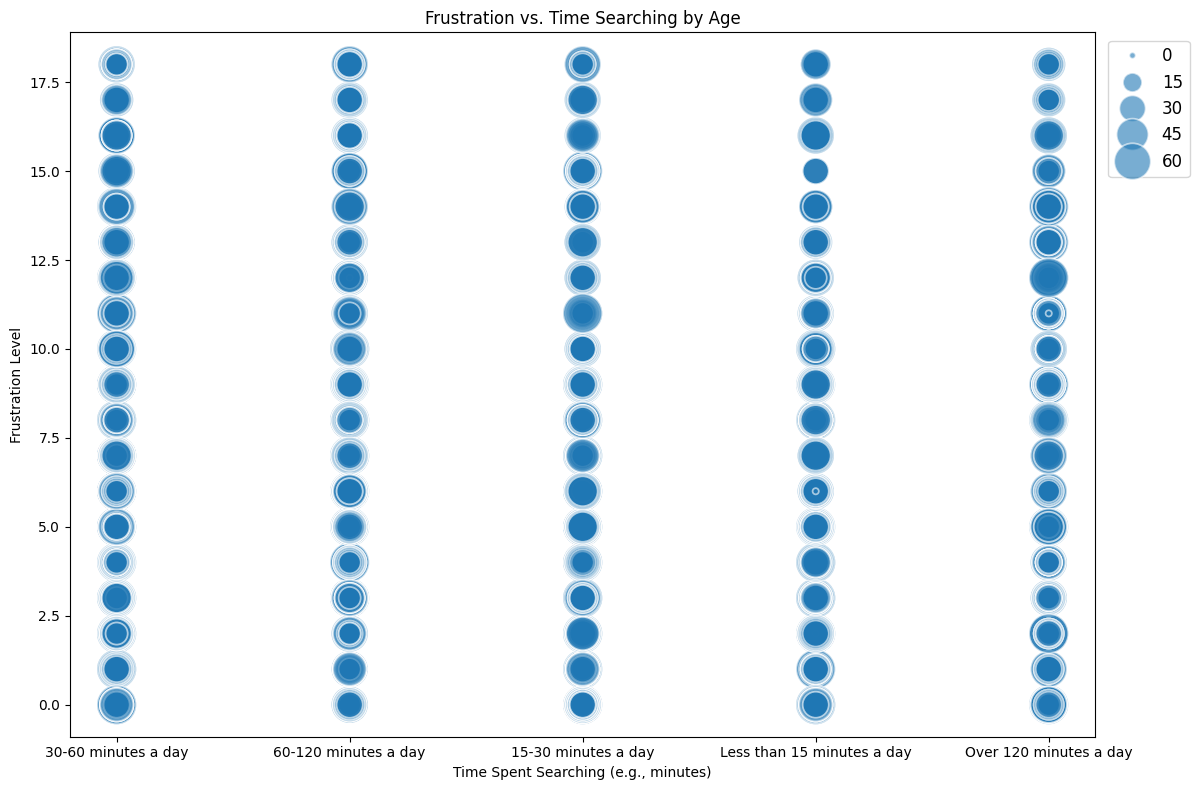

In [28]:

age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 30, '35-44 years old': 40,
    '45-54 years old': 50, '55-64 years old': 60, '65 years or older': 70, 'Prefer not to say': 0
}
df['AgeNum'] = df['Age'].map(age_mapping)


plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='TimeSearching', y='frustration_score',sizes=(20, 800),size=df['AgeNum'],legend='brief', alpha=0.6)
plt.title("Frustration vs. Time Searching by Age")
plt.xlabel("Time Spent Searching (e.g., minutes)")
plt.ylabel("Frustration Level")
plt.legend(loc='upper right', fontsize='large',bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


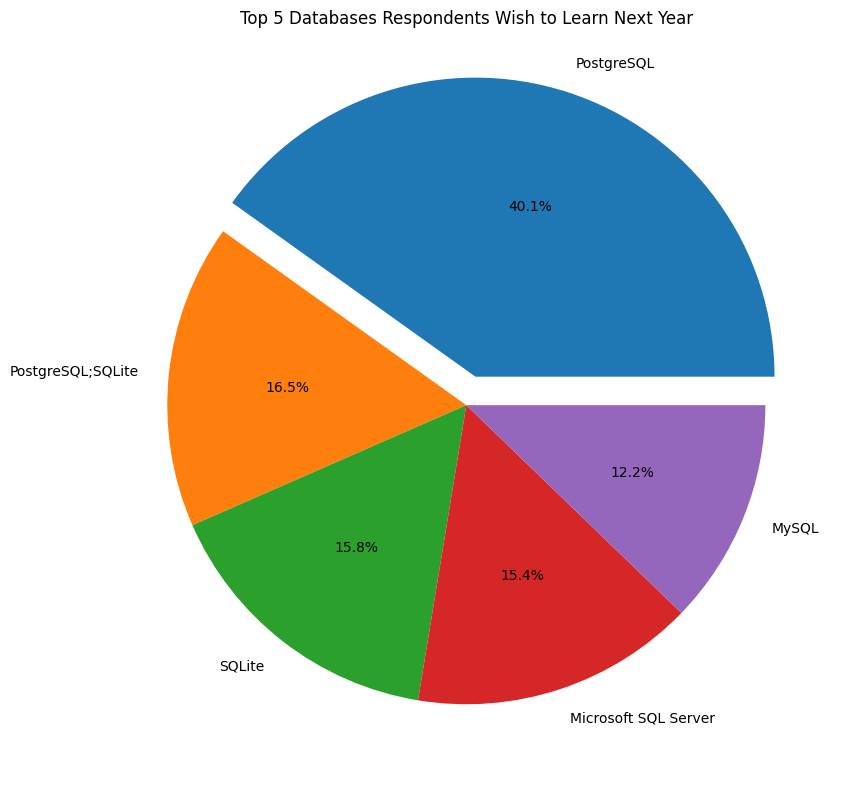

In [29]:
#connect to database
conn= sqlite3.connect("survey-data.sqlite")

#load the data from datset
query="Select * From main Where DatabaseWantToWorkWith is NOT NULL"
df=pd.read_sql_query(query, conn)

#close connection
conn.close()

df_pie = df['DatabaseWantToWorkWith'].value_counts().head(5)
#colors = plt.cm.Paired(np.linspace(0, 1, len(df_pie)))

plt.figure(figsize=(10,8))
explode = [0.1 if i == 0 else 0 for i in range(len(df_pie))]
plt.pie(x=df_pie,labels=df_pie.index, autopct='%1.1f%%',explode=explode)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.tight_layout()

plt.tight_layout()
plt.show()


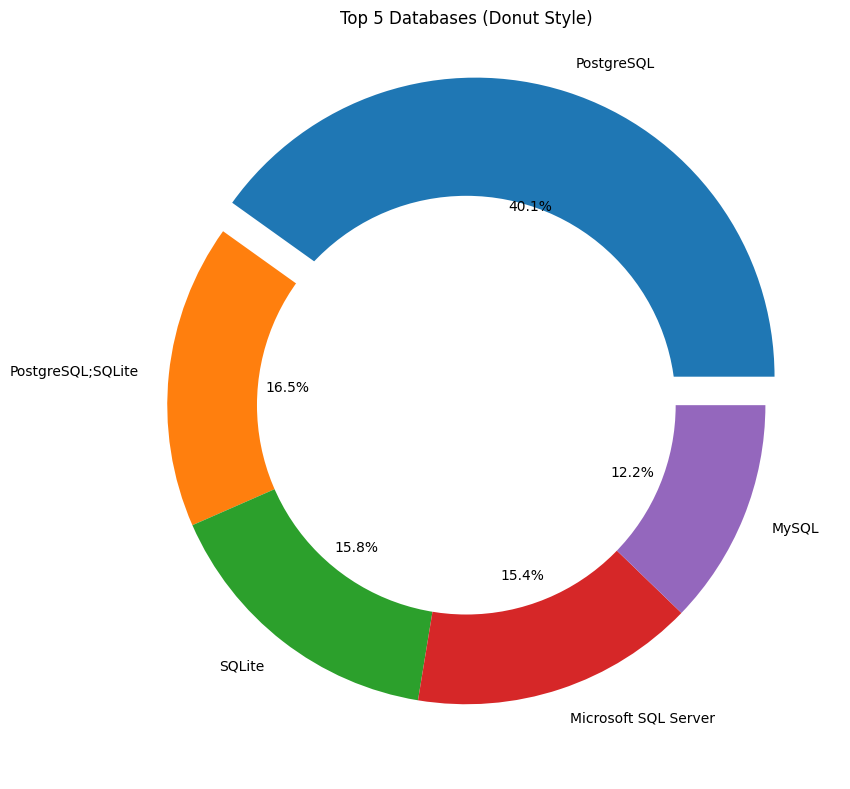

In [30]:
plt.figure(figsize=(10,8))
explode = [0.1 if i == 0 else 0 for i in range(len(df_pie))]
plt.pie(x=df_pie,labels=df_pie.index, autopct='%1.1f%%',explode=explode)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.tight_layout()
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Top 5 Databases (Donut Style)')
plt.tight_layout()
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [41]:
conn=sqlite3.connect('survey-data.sqlite')

#feth the query 
query="Select * From main Where TimeSearching is NOT NULL And TimeAnswering is NOT NULL"
df=pd.read_sql_query(query, conn)

conn.close()

#cleaning
df=df.dropna(subset=['TimeSearching','TimeAnswering'])

#filtering data based on age group
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 30, '35-44 years old': 40,
    '45-54 years old': 50, '55-64 years old': 60, '65 years or older': 70, 'Prefer not to say': 0
}
df['AgeNum'] = df['Age'].map(age_mapping)

#Filtered Age Group
df_filtered=df[(df['AgeNum']==30)]

#check distribution before median calc
print(df_filtered[['TimeSearching', 'TimeAnswering']].describe())




              TimeSearching        TimeAnswering
count                 12519                12519
unique                    5                    5
top     30-60 minutes a day  15-30 minutes a day
freq                   4871                 4211


In [44]:
print(df['TimeSearching'].unique())
print(df['TimeAnswering'].unique())

['30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']
['60-120 minutes a day' '15-30 minutes a day' '30-60 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']


In [45]:
timeSearching_map={'30-60 minutes a day':45, '60-120 minutes a day':90,
       '15-30 minutes a day':23, 'Less than 15 minutes a day':7,
       'Over 120 minutes a day':120}

df['TimeSearching_Mapped'] = df['TimeSearching'].map(timeSearching_map)

timeAnswering_map={'30-60 minutes a day':45, '60-120 minutes a day':90,
       '15-30 minutes a day':23, 'Less than 15 minutes a day':7,
       'Over 120 minutes a day':120}
df['TimeAnswering_Mapped']=df['TimeAnswering'].map(timeAnswering_map)
    

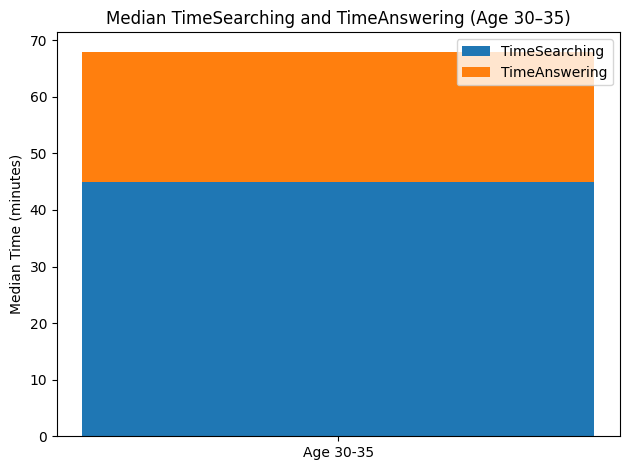

In [50]:
#calculating Meduian

TimeSearching_Median=df['TimeSearching_Mapped'].median()
TimeAnswering_Median=df['TimeAnswering_Mapped'].median()

#plot Stacked bar chart


# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(s))
ax.bar('Age 30-35', TimeSearching_Median, width=0.5, label='TimeSearching')
ax.bar('Age 30-35', TimeAnswering_Median, width=0.5, bottom=TimeSearching_Median, label='TimeAnswering')

# Add labels and legend
ax.set_ylabel('Median Time (minutes)')
ax.set_title('Median TimeSearching and TimeAnswering (Age 30–35)')
ax.legend()
plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

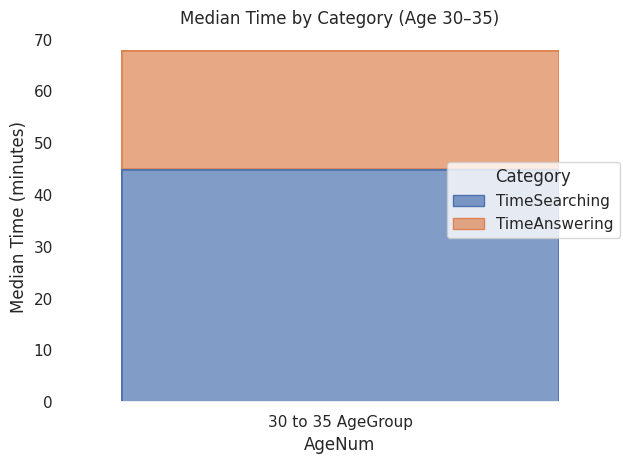

In [82]:
# Sample: create a tidy DataFrame for Seaborn
import seaborn.objects as so

data = {
    'Category': ['TimeSearching', 'TimeAnswering'],
    'MedianTime': [TimeSearching_Median, TimeAnswering_Median],
    'AgeNum': ['30 to 35 AgeGroup', '30 to 35 AgeGroup']

}
df_plot = pd.DataFrame(data)

# Seaborn barplot
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
(so.Plot( x='AgeNum', y='MedianTime',color='Category',data=df_plot).add(so.Bar(),so.Stack())
.label(title='Median Time by Category (Age 30–35)', y='Median Time (minutes)')
.theme({'axes.facecolor': 'white'})
.show())




### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


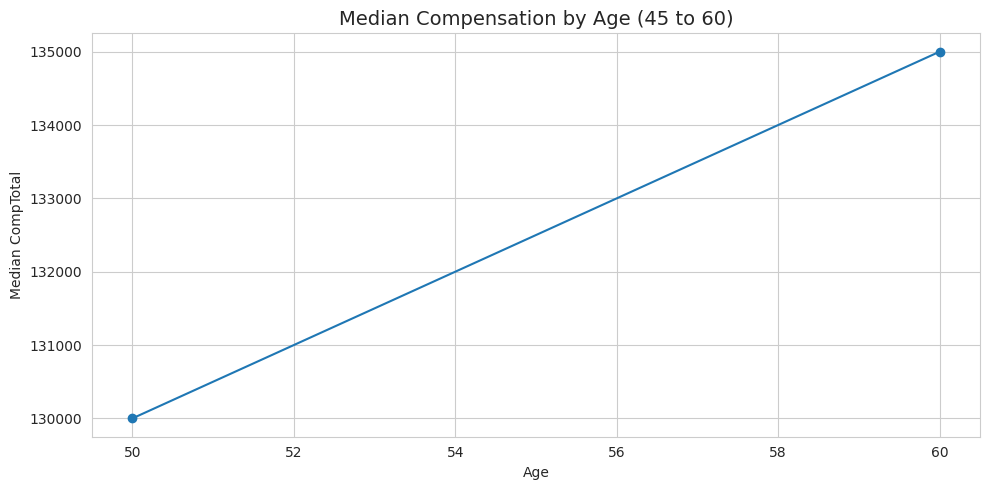

In [85]:
conn=sqlite3.connect('survey-data.sqlite')

#feth the query 
query="Select CompTotal,Age From main Where CompTotal is NOT NULL"
df=pd.read_sql_query(query, conn)

conn.close()

#cleaning
df=df.dropna()

#filtering data based on age group
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 30, '35-44 years old': 40,
    '45-54 years old': 50, '55-64 years old': 60, '65 years or older': 70, 'Prefer not to say': 0
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter for ages 45 to 60
age_filtered = df[(df['AgeNum'] >= 45) & (df['AgeNum'] <= 60)]

# Group by Age and compute median CompTotal
median_comp_by_age = age_filtered.groupby('AgeNum')['CompTotal'].median().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(median_comp_by_age['AgeNum'], median_comp_by_age['CompTotal'], marker='o', linestyle='-')

plt.title('Median Compensation by Age (45 to 60)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.grid(True)
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
conn=sqlite3.connect('survey-data.sqlite')

#feth the query 
query="Select MainBranch,Age,CompTotal From main Where CompTotal is NOT NULL And MainBranch is NOT NULL"
df=pd.read_sql_query(query, conn)

conn.close()
df=df.groupby(['MainBranch','Age'])['CompTotal'].median().reset_index()

# Plot grouped bars by age and branch
plt.figure(figsize=(12, 10))
sns.barplot(data=df, x='Age', y='CompTotal', hue='MainBranch',orient='h', palette='viridis')
plt.title('Median Compensation by Age and MainBranch', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
